# Futures

Extra Resources: 

* https://en.wikipedia.org/wiki/Futures_contract
* http://www.investopedia.com/terms/f/futurescontract.asp

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Getting Futures

A reference to a futures contract is obtained via the symbols function. Futures contracts are denoted by a base symbol + a code for month/year of delivery. CLF16 is a contract for crude oil (CL) with delivery in January (F) 2016 (16).

### List of all Available Futures (on Quantopian)

Symbol | Future |
--- | --- | 
BD | Big Dow
BO | Soybean Oil
CM | Corn E-Mini
CN | Corn
DJ | DJIA Futures
ET | Ethanol
FF | 30-Day Federal Funds
FI | 5-Year Deliverable Interest Rate Swap Futures
FS | 5-Year Interest Rate Swap Futures
FV | 5-Year T-Note
MB | Municipal Bonds
MS | Soybeans E-Mini
MW | Wheat E-Mini
OA | Oats
RR | Rough Rice
SM | Soybean Meal
SY | Soybeans
TN | 10-Year Deliverable Interest Rate Swap Futures
TS | 10-Year Interest Rate Swap Futures
TU | 2-Year T-Note
TY | 10-Year T-Note
UB | Ultra Tbond
US | 30-Year T-Bond
WC | Wheat
YM | Dow Jones E-mini
VX | VIX Futures
AD | Australian Dollar
AI | Bloomberg Commodity Index Futures
BP | British Pound
CD | Canadian Dollar
EC | Euro FX
ED | Eurodollar
EE | Euro FX E-mini
ES | S&P 500 E-Mini
EU | E-micro EUR/USD Futures
FC | Feeder Cattle
JE | Japanese Yen E-mini
JY | Japanese Yen
LB | Lumber
LC | Live Cattle
LH | Lean Hogs
MD | S&P 400 MidCap Futures
ME | Mexican Peso
MI | S&P 400 MidCap E-Mini
ND | NASDAQ 100 Futures
NK | Nikkei 225 Futures
NQ | NASDAQ 100 E-Mini
NZ | New Zealand Dollar
SF | Swiss Franc
SP | S&P 500 Futures
TB | TBills
GC | Gold
HG | Copper High Grade
SV | Silver
CL | Light Sweet Crude Oil
HO | NY Harbor ULSD Futures
HU | Unleaded Gasoline
NG | Natural Gas
PA | Palladium
PL | Platinum
PB | Pork Bellies
QG | Natural Gas E-mini
QM | Crude Oil E-Mini
XB | RBOB Gasoline Futures
EI | MSCI Emerging Markets Mini
EL | Eurodollar NYSE LIFFE
MG | MSCI EAFE Mini
XG | Gold mini-sized
YS | Silver mini-sized
RM | Russell 1000 Mini
SB | Sugar #11
ER | Russell 2000 Mini

## List of Date/Time Codes

Month | Code |
--- | --- | 
January | F
February | G
March | H
April | J
May | K
June | M
July | N
August | Q
September | U
October | V
November | X
December | Z

Let's grab the future contract data for Natural Gas for a maturity date of January 2018. (If you are viewing this lecture some time in the future, choose a further out maturity date)

In [82]:
future_contract = symbols('NGF18')

In [83]:
future_contract.asset_name

u'Natural Gas'

In [84]:
for key in future_contract.to_dict():
    print(key)
    print(future_contract.to_dict()[key])
    print('\n')

root_symbol
NG


tick_size
0.001


end_date
2017-08-08 00:00:00+00:00


exchange
NYMEX


auto_close_date
2017-12-22 00:00:00+00:00


expiration_date
2017-12-27 00:00:00+00:00


symbol
NGF18


multiplier
10000.0


notice_date
2017-12-28 00:00:00+00:00


first_traded
None


asset_name
Natural Gas


exchange_full
NYMEX


sid
1061201801


start_date
2010-08-24 00:00:00+00:00




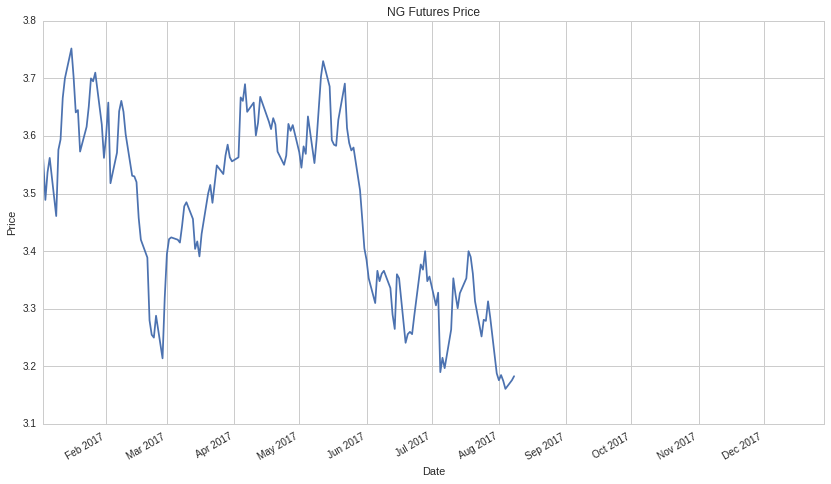

In [85]:
futures_position_value = get_pricing(future_contract, start_date = '2017-01-01', end_date = '2018-01-01', fields = 'price')
futures_position_value.name = futures_position_value.name.symbol
futures_position_value.plot()
plt.title('NG Futures Price')
plt.xlabel('Date')
plt.ylabel('Price');

## Historical Data

In [86]:
from quantopian.research.experimental import history

In [87]:
print history.__doc__


    Load a table of historical trade data.

    Parameters
    ----------
    symbols : Asset-convertible object, ContinuousFuture, or iterable of same.
        Valid input types are Asset, Integral, basestring, or ContinuousFuture.
        In the case that the passed objects are strings, they are interpreted
        as ticker symbols and resolved relative to the date specified by
        symbol_reference_date.

    fields : str or list, optional
        String or list drawn from {'price', 'open_price', 'high', 'low',
        'close_price', 'volume', 'contract'}. Defaults to 'close_price'.

    frequency : {'daily', 'minute'}, optional
        Resolution of the data to be returned. Defaults to 'daily'.

    start_date : str or pd.Timestamp, optional
        String or Timestamp representing a start date or start intraday minute
        for the returned data. Defaults to '2013-01-03'.

    end_date : str or pd.Timestamp, optional
        String or Timestamp representing an end date or e

In [88]:
ngf18 = future_contract

In [89]:
ngf18_data = history(ngf18, 
                     fields=['price', 'open_price', 'high', 'low', 'close_price', 'volume', 'contract'], 
                     frequency='daily', 
                     start_date='2017-06-01', 
                     end_date='2017-08-01')

ngf18_data.head()

,price,open_price,high,low,close_price,volume,contract
2017-06-01 00:00:00+00:00,3.385,3.412,3.435,3.341,3.385,5497.0,Future(1061201801 [NGF18])
2017-06-02 00:00:00+00:00,3.353,3.386,3.386,3.336,3.353,2443.0,Future(1061201801 [NGF18])
2017-06-05 00:00:00+00:00,3.310,3.373,3.378,3.298,3.310,2457.0,Future(1061201801 [NGF18])
2017-06-06 00:00:00+00:00,3.366,3.318,3.371,3.307,3.366,2061.0,Future(1061201801 [NGF18])
2017-06-07 00:00:00+00:00,3.348,3.370,3.393,3.342,3.348,1834.0,Future(1061201801 [NGF18])


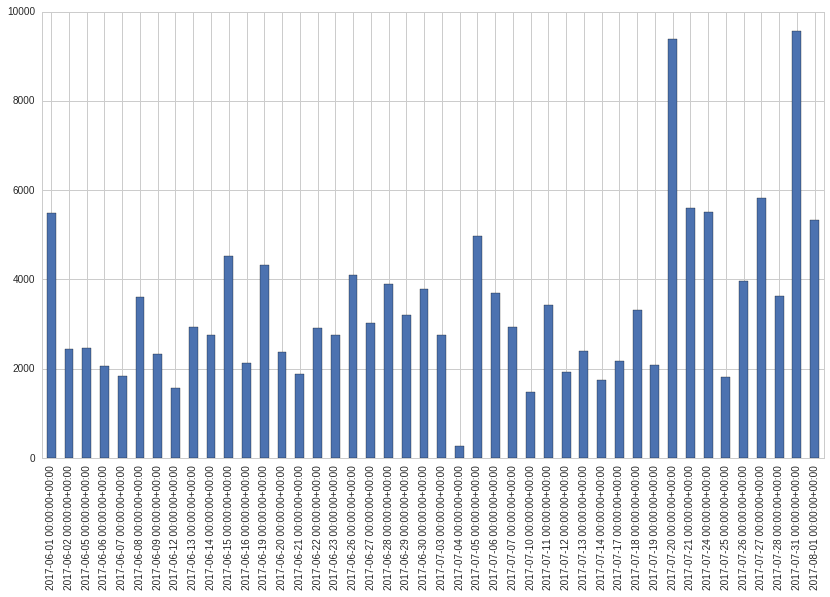

In [90]:
# Notice the 4th of July!
ngf18_data['volume'].plot(kind='bar')

## Comparison of Different Maturity Dates

In [91]:
ng_contracts = symbols(['NGF17', 'NGG17', 'NGH17', 'NGJ17', 'NGK17', 'NGM17'])

In [92]:
ng_consecutive_contract_volume = history(ng_contracts, 
                                         fields='volume', 
                                         frequency='daily', 
                                         start_date='2016-01-01', 
                                         end_date='2017-08-01')

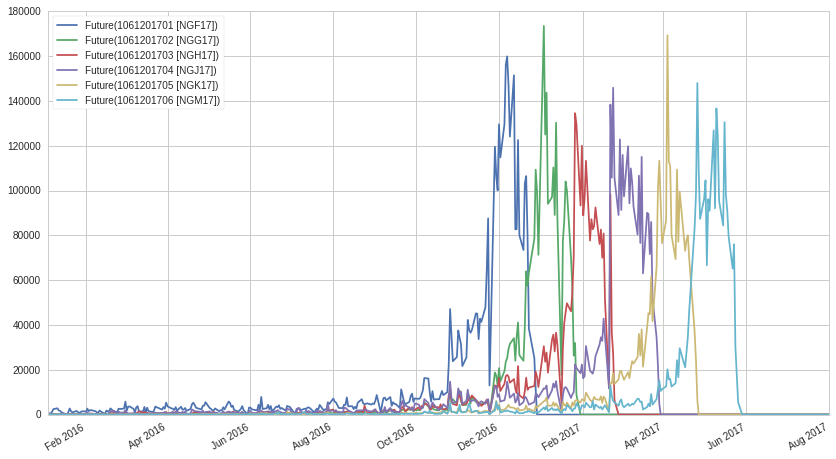

In [93]:
ng_consecutive_contract_volume.plot()

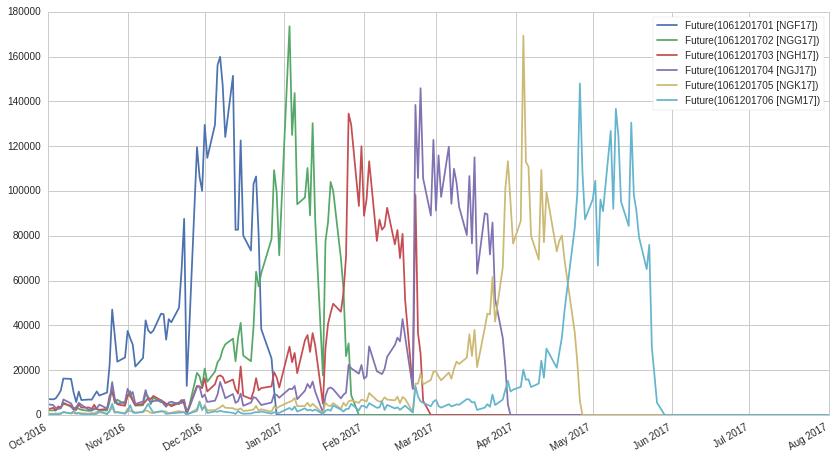

In [94]:
ng_consecutive_contract_volume.plot(xlim=['2016-10-01','2017-08-01'])

Trading activity jumps from one contract to the next. Transitions happen just prior to the delivery date of each contract.

This phenomenon can make it difficult to work with futures. Having to explicitly reference a series of transient contracts when trading or simulating futures can be a hassle.

In order to trade consecutive contracts for the same underlying future, we can use what's called a "Continuous Future".

# Continuous Futures

Continuous futures are abstractions over the 'underlying' commodities/assets/indexes of futures. For example, if we wanted to trade crude oil, we could create a reference to CL, instead of a series of CL contracts. Continuous futures essentially maintain a reference to a 'current' contract deemed to be the active contract for the particular underlying.

We use the continuous futures objects as part of the platform to get a continuous chain of historical data for futures contracts, taking these concerns into account. There are several ways to adjust for the cost of carry when looking at historical data, though people differ on what they prefer. The general consensus is that an adjustment should be done.

Continuous futures are not tradable assets. They maintain a reference to the current active contract related to a given underlying.

In [95]:
from quantopian.research.experimental import continuous_future

In [96]:
print(continuous_future.__doc__)


    Create a specifier for a continuous contract.

    Parameters
    ----------
    root_symbol : str
        The root symbol for the continuous future.

    offset : int, optional
        The distance from the primary contract. Default is 0.

    roll : str, optional
        How rolls are determined. Options are 'volume' and 'calendar'. Default
        is 'volume'.

    adjustment : str
        Method for adjusting lookback prices between rolls. Options are
        'mul', 'add', and None. Default is 'mul'.

    Returns
    -------
    continuous_future : ContinuousFuture
        The continuous future specifier.
    


There are 4 arguments that we need to consider.

- **`root_symbol`**: The root symbol of the underlying. For example, 'CL' for crude oil.
- **`offset`**: The distance from the primary contract. 0 = primary, 1 = secondary, etc. We'll get into this more later.
- **`roll`**: How to determine the 'current' contract of the continuous future. Current options are **`'volume'`** and **`'calendar'`**. The 'volume' approach chooses the current active contract based on trading volume. The 'calendar' approach chooses the current active contract based simply on the `auto_close_date`s of each contract.**
- **`adjustment`**: How to adjust historical prices from earlier contracts. We'll get into this more later. Options are **`'mul'`**, **`'add'`**, or **`'None'`**.

In [97]:
continuous_ng = continuous_future('NG', offset=0, roll='volume', adjustment='mul')

In [98]:
continuous_ng

ContinuousFuture(94090707563773952, root_symbol='NG', offset=0, roll_style='volume', adjustment='mul')

In [99]:
ng_cont_active = history(continuous_ng, 
                    fields=['contract','price','volume'] ,
                    frequency='daily', 
                    start_date='2016-10-01', 
                    end_date='2017-08-01')

In [100]:
ng_cont_active.head()

,price,volume,contract
2016-10-03 00:00:00+00:00,4.067,86282.0,Future(1061201611 [NGX16])
2016-10-04 00:00:00+00:00,4.161,90845.0,Future(1061201611 [NGX16])
2016-10-05 00:00:00+00:00,4.245,119522.0,Future(1061201611 [NGX16])
2016-10-06 00:00:00+00:00,4.251,135372.0,Future(1061201611 [NGX16])
2016-10-07 00:00:00+00:00,4.438,159697.0,Future(1061201611 [NGX16])


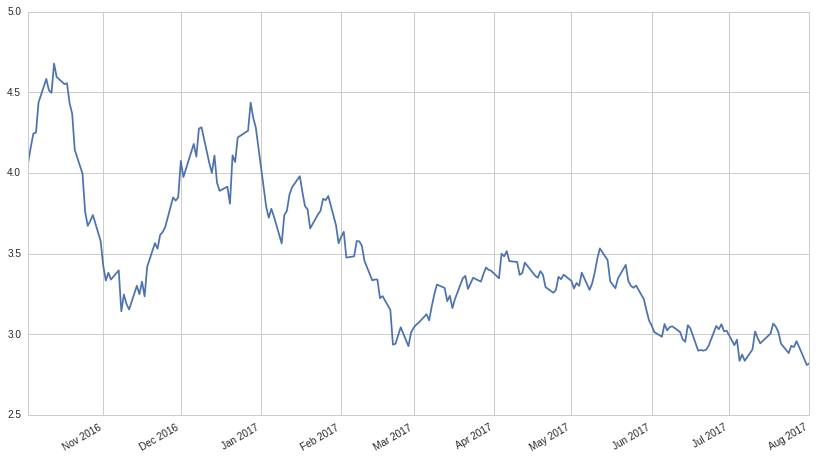

In [101]:
ng_cont_active['price'].plot()

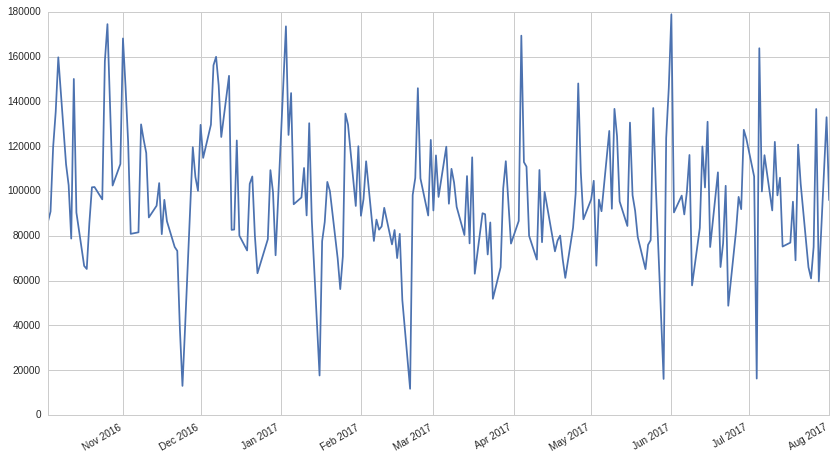

In [102]:
ng_cont_active['volume'].plot()

In [103]:
ng_consecutive_contract_volume = history(ng_contracts, 
                                         fields='volume', 
                                         frequency='daily', 
                                         start_date='2016-10-01', 
                                         end_date='2017-08-01')

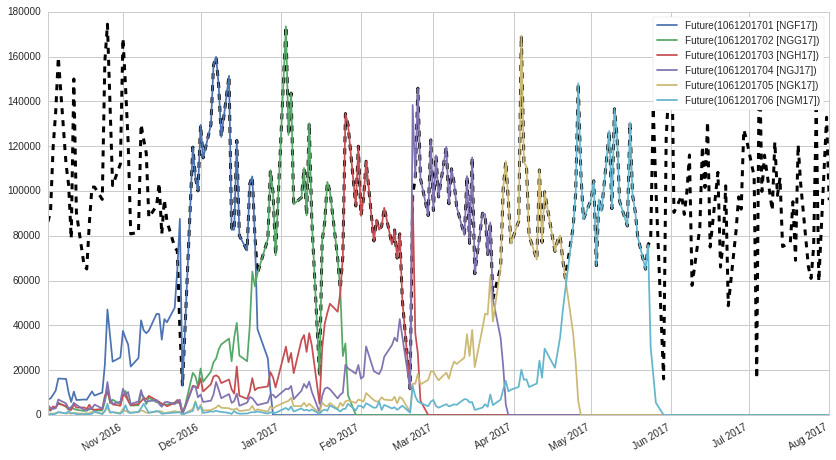

In [104]:
ax = ng_cont_active['volume'].plot(ls='--',c='black',lw=3)
ng_consecutive_contract_volume.plot(ax=ax)

In [105]:
ng_consecutive_contract_price = history(ng_contracts, 
                                         fields='price', 
                                         frequency='daily', 
                                         start_date='2016-10-01', 
                                         end_date='2017-08-01')

In [106]:
ng_continuous_active = history(continuous_ng, 
                    fields=['contract','price','volume'] ,
                    frequency='daily', 
                    start_date='2016-10-01', 
                    end_date='2017-08-01')

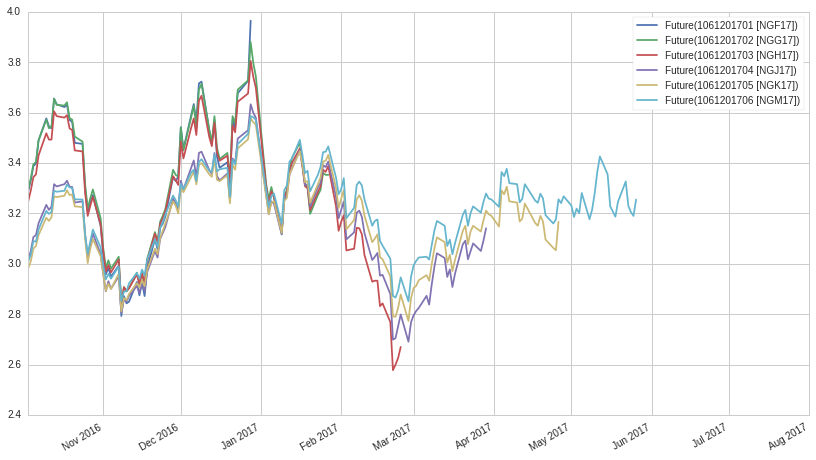

In [107]:
ng_consecutive_contract_price.plot()

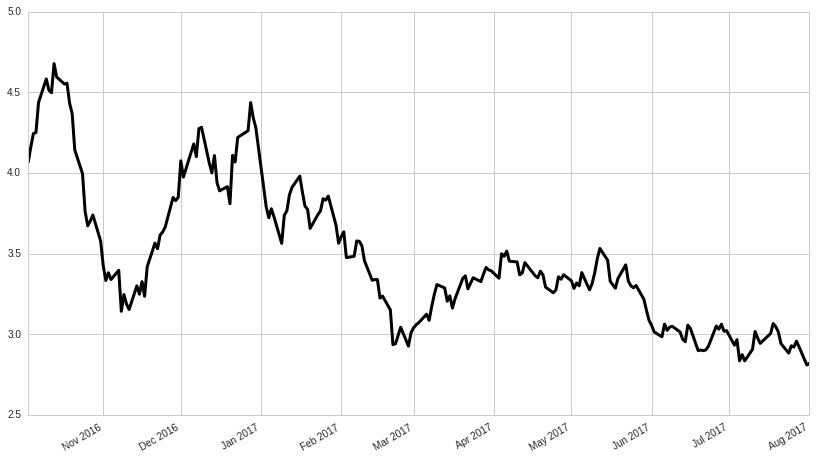

In [108]:
ng_cont_active['price'].plot(c='black',lw=3)

This represents the price of the underlying commodity, NG, on the most actively traded contract. Much easier to look at.

You might notice that the price at the start of this plot exceeds 4.0, but when we plotted the individual contracts, it barely made it above 3.6. This is because the historical price is getting adjusted for jumps between contracts.

The best way to explain this is to plot the prices history of the unadjusted continuous future.

In [111]:
continuous_ng_unadjusted = continuous_future('NG', offset=0, roll='volume', adjustment=None)

In [115]:
ng_unadjusted_history = history(continuous_ng_unadjusted, 
                                fields=['contract', 'price'], 
                                frequency='daily', 
                                start_date='2016-10-01', 
                                end_date='2017-08-01')

In [117]:
ng_unadjusted_history.head()

,price,contract
2016-10-03 00:00:00+00:00,2.906,Future(1061201611 [NGX16])
2016-10-04 00:00:00+00:00,2.973,Future(1061201611 [NGX16])
2016-10-05 00:00:00+00:00,3.033,Future(1061201611 [NGX16])
2016-10-06 00:00:00+00:00,3.037,Future(1061201611 [NGX16])
2016-10-07 00:00:00+00:00,3.171,Future(1061201611 [NGX16])


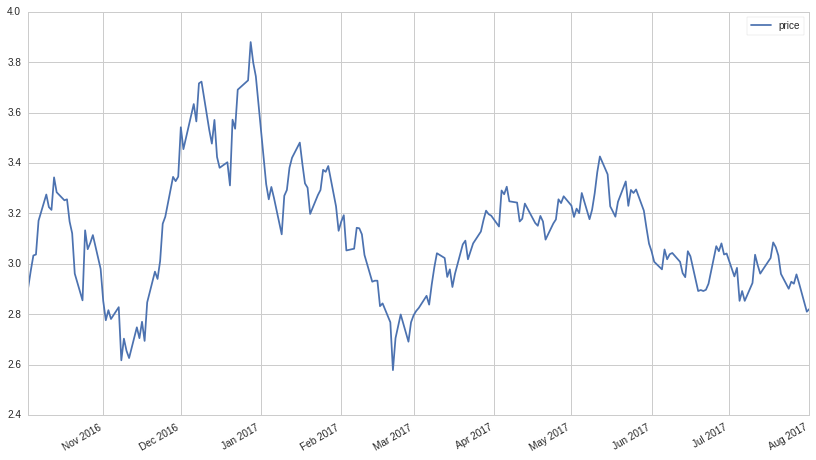

In [113]:
ng_unadjusted_history.plot()

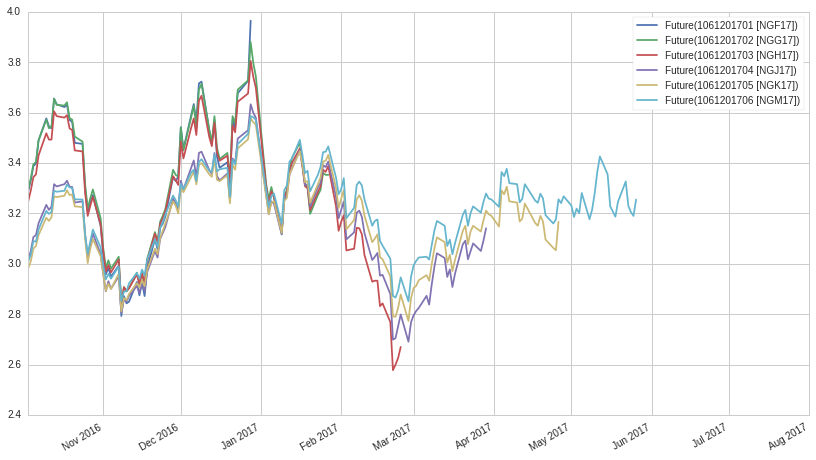

In [114]:
ng_consecutive_contract_price.plot()

In [118]:
pivot_unadj = ng_unadjusted_history.pivot(index=ng_unadjusted_history.index,columns='contract')

In [119]:
pivot_unadj.head()

price  \
contract                  Future(1061201611 [NGX16])   
2016-10-03 00:00:00+00:00                      2.906   
2016-10-04 00:00:00+00:00                      2.973   
2016-10-05 00:00:00+00:00                      3.033   
2016-10-06 00:00:00+00:00                      3.037   
2016-10-07 00:00:00+00:00                      3.171   

                                                      \
contract                  Future(1061201612 [NGZ16])   
2016-10-03 00:00:00+00:00                        NaN   
2016-10-04 00:00:00+00:00                        NaN   
2016-10-05 00:00:00+00:00                        NaN   
2016-10-06 00:00:00+00:00                        NaN   
2016-10-07 00:00:00+00:00                        NaN   

                                                      \
contract                  Future(1061201701 [NGF17])   
2016-10-03 00:00:00+00:00                        NaN   
2016-10-04 00:00:00+00:00                        NaN   
2016-10-05 00:00:00+00:00                        NaN   
2016-10-06 00:00:00+00:00                        NaN   
2016-10-07 00:00:00+00:00                        NaN   

                                                      \
contract                  Future(1061201702 [NGG17])   
2016-10-03 00:00:00+00:00                        NaN   
2016-10-04 00:00:00+00:00                        NaN   
2016-10-05 00:00:00+00:00                        NaN   
2016-10-06 00:00:00+00:00                        NaN   
2016-10-07 00:00:00+00:00                        NaN   

                                                      \
contract                  Future(1061201703 [NGH17])   
2016-10-03 00:00:00+00:00                        NaN   
2016-10-04 00:00:00+00:00                        NaN   
2016-10-05 00:00:00+00:00                        NaN   
2016-10-06 00:00:00+00:00                        NaN   
2016-10-07 00:00:00+00:00                        NaN   

                                                      \
contract                  Future(1061201704 [NGJ17])   
2016-10-03 00:00:00+00:00                        NaN   
2016-10-04 00:00:00+00:00                        NaN   
2016-10-05 00:00:00+00:00                        NaN   
2016-10-06 00:00:00+00:00                        NaN   
2016-10-07 00:00:00+00:00                        NaN   

                                                      \
contract                  Future(1061201705 [NGK17])   
2016-10-03 00:00:00+00:00                        NaN   
2016-10-04 00:00:00+00:00                        NaN   
2016-10-05 00:00:00+00:00                        NaN   
2016-10-06 00:00:00+00:00                        NaN   
2016-10-07 00:00:00+00:00                        NaN   

                                                      \
contract                  Future(1061201706 [NGM17])   
2016-10-03 00:00:00+00:00                        NaN   
2016-10-04 00:00:00+00:00                        NaN   
2016-10-05 00:00:00+00:00                        NaN   
2016-10-06 00:00:00+00:00                        NaN   
2016-10-07 00:00:00+00:00                        NaN   

                                                      \
contract                  Future(1061201707 [NGN17])   
2016-10-03 00:00:00+00:00                        NaN   
2016-10-04 00:00:00+00:00                        NaN   
2016-10-05 00:00:00+00:00                        NaN   
2016-10-06 00:00:00+00:00                        NaN   
2016-10-07 00:00:00+00:00                        NaN   

                                                      \
contract                  Future(1061201708 [NGQ17])   
2016-10-03 00:00:00+00:00                        NaN   
2016-10-04 00:00:00+00:00                        NaN   
2016-10-05 00:00:00+00:00                        NaN   
2016-10-06 00:00:00+00:00                        NaN   
2016-10-07 00:00:00+00:00                        NaN   

                                                      
contract                  Future(1061201709 [NGU17])  
2016-10

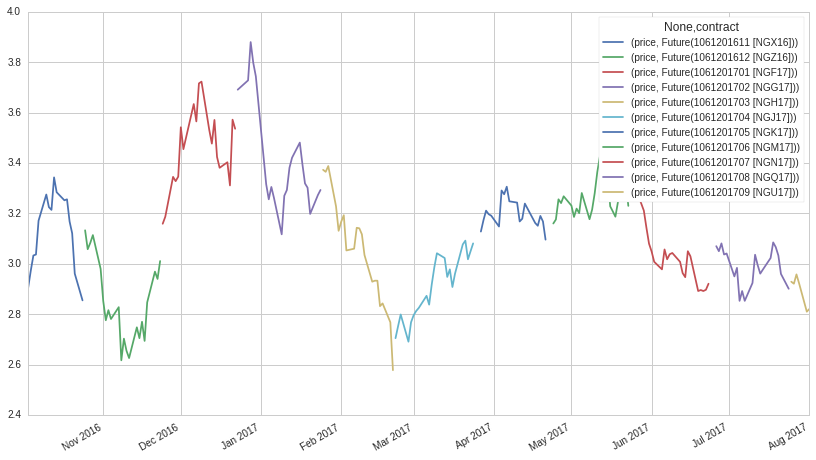

In [120]:
pivot_unadj.plot()

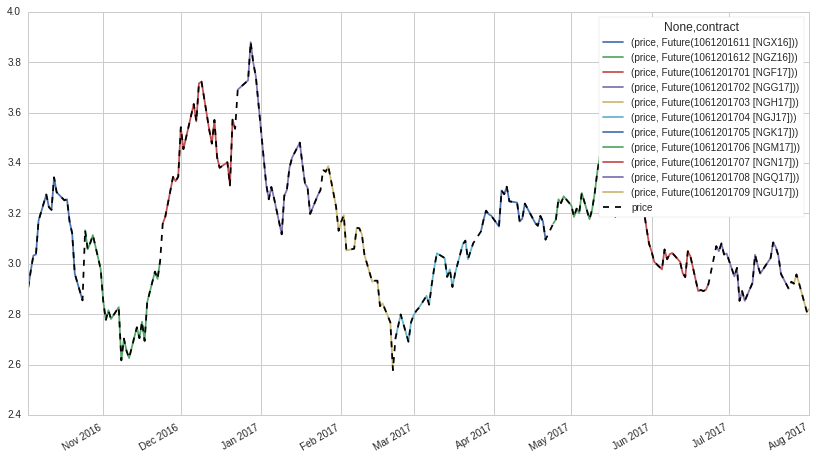

In [126]:
ax = pivot_unadj.plot()
ng_unadjusted_history.plot(ax=ax,ls='--',c='black')

## Adjustment Types

There are two main adjustment types, additive or multiplicative.

* Multiplicative adjustment, mul

This essentially computes the adjustment as the ratio of new contract price / old contract price whenever the active contract rolls to a new contract.

* Arithmetic adjustment, 'add'

The 'add' technique computes the adjustment as the difference new contract price - old contract price.